In [ ]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

# Fast Fourier Transforms

This notebook provides some worked examples of using FFTs


## Generate and plot some data 

To start off, lets make a simulated data set consisting of a cos wave with unit amplitude and frequency 10Hz, sampled at 100 Hz for 1s. Then plot this as a function of time.

We'll also sample the cos wave at a much higher rate (10000Hz) and plot it to show the smooth underlying function 


Text(0, 0.5, 'x(t)')

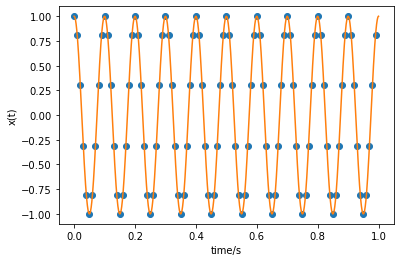

In [1]:
import pylab as plt
import numpy as np
%matplotlib inline

T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (10.0, 1.0, 0.0)
    x = a*np.cos(2*np.pi*f*t+phi) 
    return x 

x = signal(t) 
plt.plot(t,x,'o') 

fsample1 = 10000.0 
dT1 = 1.0/fsample1
N1 = T/dT1 
n1 = np.arange(0,N1)
t1 = n1*dT1
x1 = signal(t1) 
plt.plot(t1,x1,'-') 
plt.xlabel('time/s')
plt.ylabel('x(t)')


Try changing the frequency `f` to 90Hz.  Note that the samples taken at 100Hz look like a cosine with frequency 10Hz. 
You will need to change the xrange of the plot using `xlim` to see this more clearly. Try the same with a sine wave and note any differences.

Text(0, 0.5, 'x(t)')

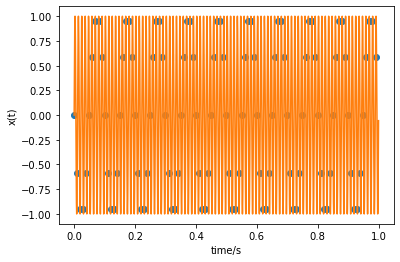

In [17]:
import pylab as plt
import numpy as np
%matplotlib inline

T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (90.0, 1.0, 0.0)
    x = a*np.sin(2*np.pi*f*t+phi) 
    return x 

x = signal(t) 
plt.plot(t,x,'o') 

fsample1 = 10000.0 
dT1 = 1.0/fsample1
N1 = T/dT1 
n1 = np.arange(0,N1)
t1 = n1*dT1
x1 = signal(t1) 
plt.plot(t1,x1,'-') 
plt.xlabel('time/s')
plt.ylabel('x(t)')

## Calculate the power spectrum 

Now change back to the 10Hz signal and use the numpy `fft` routine to calculate the Fourier transform of the 100 Hz data and plot the power spectrum - ie the $|amplitude|^2$ ot the Fourier coefficients as a function of frequency. 

Also make a second plot showing the the real and imaginary parts of the fourier coefficients. 

Note that the range of frequencies runs from 0 to $f_{sample}$ and the fourier amplitudes are symmetrical about $f_{sample}/2$. 


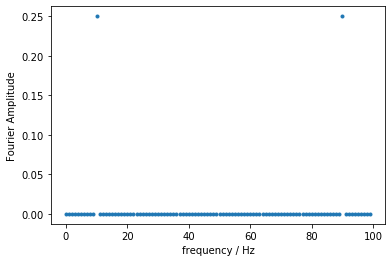

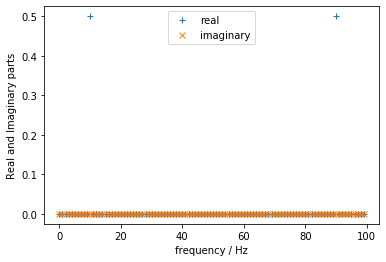

In [12]:
T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (10.0, 1.0, 0.0)
    x = a*np.cos(2*np.pi*f*t+phi) 
    return x 

x = signal(t) 

# Fourier transform
X = 1./N*np.fft.fft(x) 
# Fourier amplitudes 
Asquared = np.abs(X)**2
# Fourier frequencies 
f = n/T 

plt.plot(f,Asquared,'.')
plt.xlabel('frequency / Hz')
plt.ylabel('Fourier Amplitude')
plt.figure()
plt.plot(f,np.real(X),'+')
plt.plot(f,np.imag(X),'x')
plt.xlabel('frequency / Hz')
plt.ylabel('Real and Imaginary parts')
plt.legend(['real', 'imaginary'])


Next we can use the numpy `fftshift` routine to convert the fft array to represent frequencies ranging from $-f_{sample}/2$ to $+f_{sample}/2$

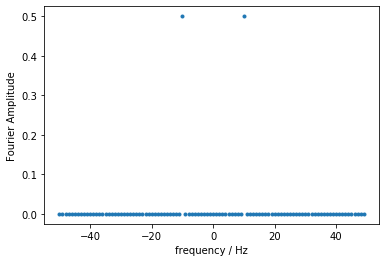

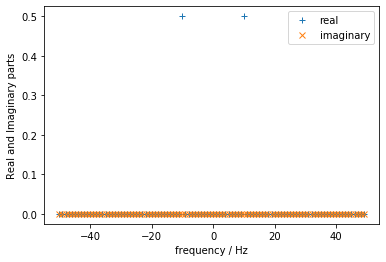

In [11]:
T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (10.0, 1.0, 0.0)
    x = a*np.cos(2*np.pi*f*t+phi) 
    return x 

x = signal(t) 

X = 1./N*np.fft.fft(x) 
f = n/T

Xs = np.fft.fftshift(X)
fs = f-N/2 

plt.plot(fs,np.abs(Xs),'.')
plt.xlabel('frequency / Hz')
plt.ylabel('Fourier Amplitude')

plt.figure()
plt.plot(fs,np.real(Xs),'+')
plt.plot(fs,np.imag(Xs),'x')

plt.xlabel('frequency / Hz')
plt.ylabel('Real and Imaginary parts')
plt.legend(['real', 'imaginary'])


Now we can set the plot limits to show only frequencies from -20 to +20Hz, and change the amplitude phase of the signal to see how the Fourier coefficients change. In the code cell, try changing `a`, `phi` and `f` and look at how this affects the power spectrum. You could also add components to the signal with different frequencies and amplitudes. 


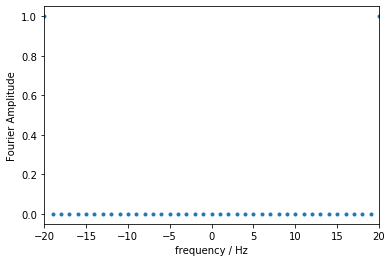

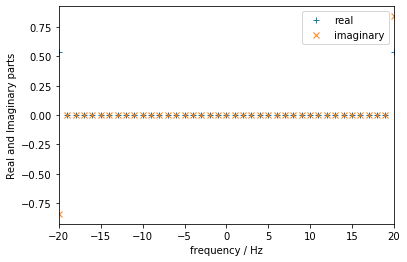

In [18]:
T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (20.0, 2.0, 1.0)
    x = a*np.cos(2*np.pi*f*t+phi) 
    return x 

x = signal(t) 

X = 1./N*np.fft.fft(x) 
f = n/T

Xs = np.fft.fftshift(X)
fs = f-N/2 

plt.plot(fs,np.abs(Xs),'.')
plt.xlabel('frequency / Hz')
plt.ylabel('Fourier Amplitude')
plt.xlim(-20,20)
plt.figure()
plt.plot(fs,np.real(Xs),'+')
plt.plot(fs,np.imag(Xs),'x')
plt.xlim(-20,20)
plt.xlabel('frequency / Hz')
plt.ylabel('Real and Imaginary parts')
plt.legend(['real', 'imaginary'])


## Gaussian noise 

Add Gaussian noise with standard deviation of 0.4 to each data point and look at the power spectrum. The noise is uniformaly distributed as a function of frequency - it is 'white' noise. Notice that the signal is detected very clearly above the noise in Fourier space, but the signal not at all visible in real space. 

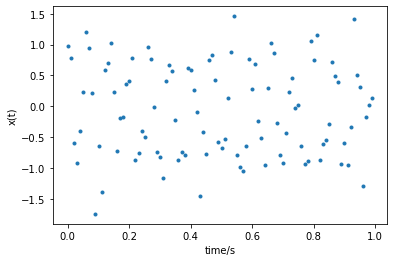

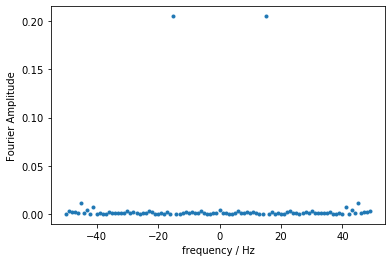

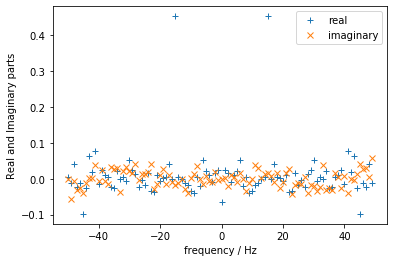

In [19]:
T = 1.0 
fsample = 100.0
dT = 1.0/fsample
N = T/dT 
n = np.arange(0,N)
t = n*dT

def signal(t) : 
    (f, a, phi)  = (15.0, 1.0, 0.0)
    noise = np.random.normal(0,0.4,t.shape)
    x = a*np.cos(2*np.pi*f*t+phi) + noise 
    return x 

x = signal(t) 

plt.plot(t,x,'.') 
plt.xlabel('time/s')
plt.ylabel('x(t)')

X = 1./N*np.fft.fft(x) 
f = n/T
Xs = np.fft.fftshift(X)
fs = f- N/2
plt.figure()
plt.plot(fs,np.abs(Xs)**2,'.')

plt.xlabel('frequency / Hz')
plt.ylabel('Fourier Amplitude')

plt.figure()
plt.plot(fs,np.real(Xs),'+')
plt.plot(fs,np.imag(Xs),'x')
plt.xlabel('frequency / Hz')
plt.ylabel('Real and Imaginary parts')
plt.legend(['real', 'imaginary'])


Now it's your turn to use FFTs to tell the difference between wine and vinegar

## Wine or vinegar? 

When a bottle of wine is placed in a magnet, the nuclei of any hydrogen atoms in the molecules making up the wine can be made to emit very weak (magnetic) signals. Each nucleus gives out a signal at a characteristic frequency. If a molecule contains more than one hydrogen atom, the observed signal will have more than one frequency component. The Fourier transform of the signal therefore gives a spectrum which helps identify the molecules making up the wine. This technique of identifying the chemical composition of a liquid is known as nuclear magnetic resonance (NMR) spectroscopy.

In particular, it is known that the NMR signal from a bottle of good wine has a spectrum with 3 lines in it, whereas a bottle of bad wine will have 4 lines, the extra line coming from acetic acid, i.e., vinegar (April J. Weekley, Paul Bruins, and Matthew P. Augustine, Nondestructive method of determining acetic acid spoilage in an unopened bottle of wine. Am. J. Enol. Vitic., 53(4):318-321, 2002.)

The file nmr_data.txt contains measurements of a 50 ms duration NMR signal from an unopened bottle of wine, and can be downloaded from the webCT pages. The signal is quite noisy, and it is far from obvious what frequencies make up the signal. The aim of this question is to use matlab to read in this signal, determine what the component frequencies are, and therefore decide whether the wine is ok to drink.

1) Read in the signal data and plot the signal versus time in ms. Assume that the signal is sampled at a constant rate and covers exactly 50ms.


2) Calculate the FFT of the signal, and plot the power spectrum against frequency $f$. 

3) Use the fftshift command to put the zero frequencies in the centre of the spectrum, and plot the new version of the spectrum against the new set of frequencies. It is probably clear to use `semilogy` to make the plot using a log-scale for the y axis. 

4) What values of frequency do the peaks occur? Is the wine drinkable?

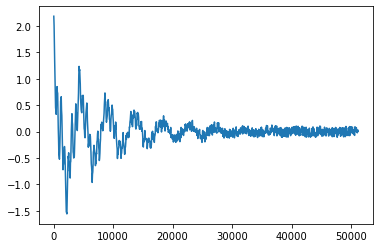

In [45]:
import pylab as plt
import numpy as np

data = []
f = open(r"C:\Users\cory\Documents\nmr_data.txt")
for line in f:
    data.append(float(line))
y = data
length_data = len(data)
x = np.linspace(0, 51200, 1024)
plt.plot(x,y)

[]

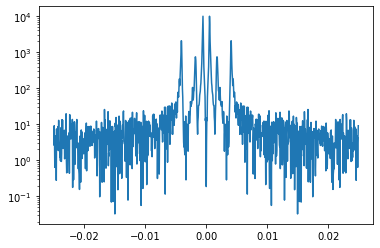

In [47]:
import numpy as np
import matplotlib.pyplot as plt

data = y
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 0.05
freqs = np.fft.fftfreq(len(data), time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.semilogy()

In [ ]:
3 peaks so it drinkable 